In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
df = pd.read_csv('Merged_HR_Training_Data1.csv')

In [19]:
print(df[['training', 'JobSatisfaction', 'PerformanceRating']].describe())

          training  JobSatisfaction  PerformanceRating
count  7040.000000      7040.000000        7040.000000
mean      2.942472         2.677273           2.834801
std       1.740997         1.237224           1.001553
min       0.000000         1.000000           1.000000
25%       2.000000         2.000000           2.000000
50%       3.000000         3.000000           3.000000
75%       4.000000         4.000000           3.000000
max       6.000000         5.000000           5.000000


In [20]:
X = df[['training']]
y_job_satisfaction = df['JobSatisfaction']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y_job_satisfaction, test_size=0.2, random_state=42)

In [22]:
model_job_satisfaction = LinearRegression()
model_job_satisfaction.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred_job_satisfaction = model_job_satisfaction.predict(X_test)

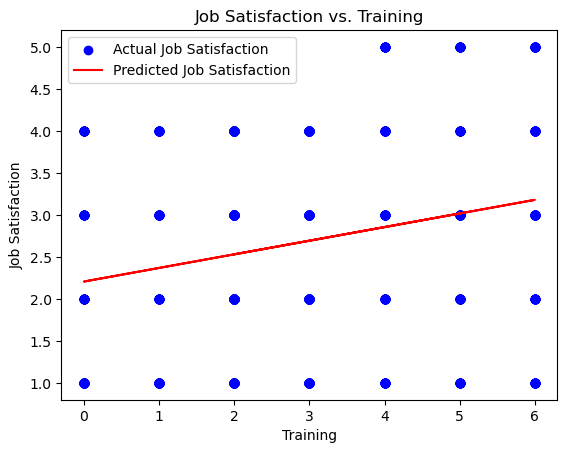

In [24]:
plt.scatter(X_test, y_test, color='blue', label='Actual Job Satisfaction')
plt.plot(X_test, y_pred_job_satisfaction, color='red', label='Predicted Job Satisfaction')
plt.title('Job Satisfaction vs. Training')
plt.xlabel('Training')
plt.ylabel('Job Satisfaction')
plt.legend()
plt.show()

In [25]:
print(f"Intercept: {model_job_satisfaction.intercept_}, Coefficient: {model_job_satisfaction.coef_}")

Intercept: 2.206792428860551, Coefficient: [0.16212421]


In [26]:
y_performance_rating = df['PerformanceRating']

In [27]:
X_train_perf, X_test_perf, y_train_perf, y_test_perf = train_test_split(X, y_performance_rating, test_size=0.2, random_state=42)

In [28]:
model_performance = LinearRegression()
model_performance.fit(X_train_perf, y_train_perf)

LinearRegression()

In [29]:
y_pred_performance = model_performance.predict(X_test_perf)

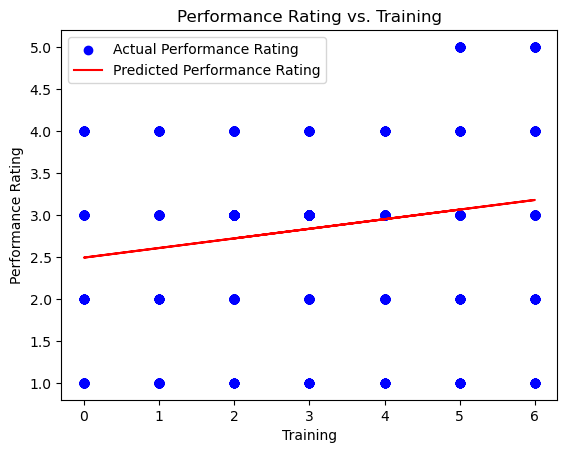

In [30]:
plt.scatter(X_test_perf, y_test_perf, color='blue', label='Actual Performance Rating')
plt.plot(X_test_perf, y_pred_performance, color='red', label='Predicted Performance Rating')
plt.title('Performance Rating vs. Training')
plt.xlabel('Training')
plt.ylabel('Performance Rating')
plt.legend()
plt.show()

In [31]:
print(f"Intercept: {model_performance.intercept_}, Coefficient: {model_performance.coef_}")

Intercept: 2.4917304249755037, Coefficient: [0.1143895]


In [33]:
training_data = df[['training']]  # Independent variable (training data)
satisfaction_data = df['JobSatisfaction']  # Dependent variable (job satisfaction)
performance_data = df['PerformanceRating']  # Dependent variable (performance rating)

In [34]:
train_X, test_X, train_y_satisfaction, test_y_satisfaction = train_test_split(
    training_data, satisfaction_data, test_size=0.2, random_state=42
)

In [35]:
train_X_perf, test_X_perf, train_y_performance, test_y_performance = train_test_split(
    training_data, performance_data, test_size=0.2, random_state=42
)

In [36]:
odel_job_satisfaction = LinearRegression()
model_job_satisfaction.fit(train_X, train_y_satisfaction)

LinearRegression()

In [37]:
predicted_satisfaction = model_job_satisfaction.predict(test_X)

In [38]:
model_performance = LinearRegression()
model_performance.fit(train_X_perf, train_y_performance)


LinearRegression()

In [39]:
predicted_performance = model_performance.predict(test_X_perf)

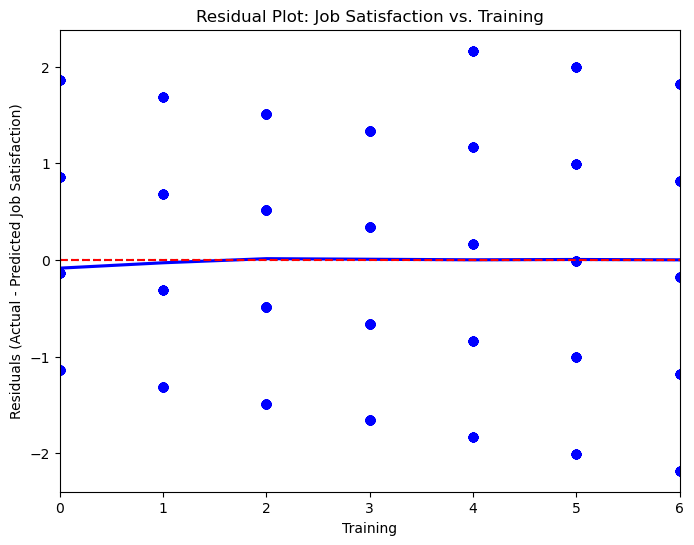

In [40]:
import seaborn as sns

# Calculate residuals (difference between actual and predicted job satisfaction)
residuals_satisfaction = test_y_satisfaction - predicted_satisfaction

# Create the residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=test_X['training'], y=residuals_satisfaction, lowess=True, color='blue')
plt.title('Residual Plot: Job Satisfaction vs. Training')
plt.xlabel('Training')
plt.ylabel('Residuals (Actual - Predicted Job Satisfaction)')
plt.axhline(0, color='red', linestyle='--')
plt.show()

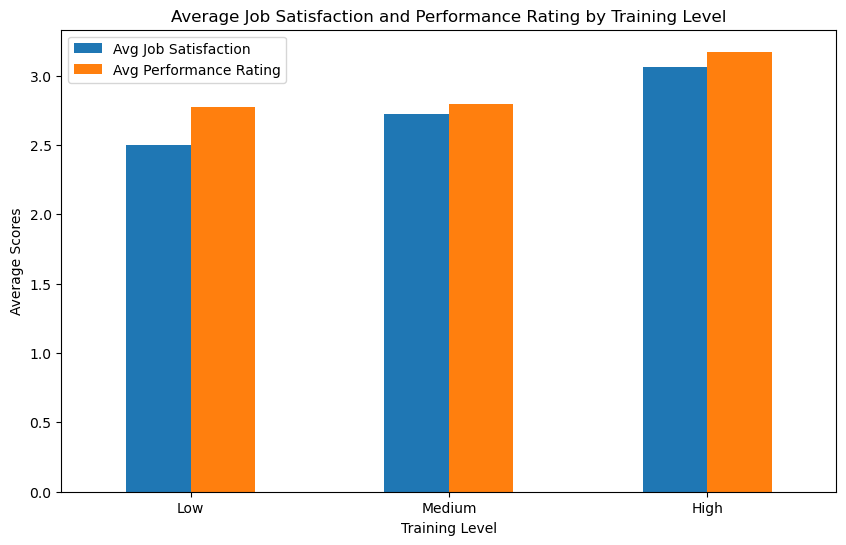

In [41]:
df['Training_Level'] = pd.cut(df['training'], bins=[0, 2, 4, 6], labels=['Low', 'Medium', 'High'])


average_satisfaction = df.groupby('Training_Level')['JobSatisfaction'].mean()
average_performance = df.groupby('Training_Level')['PerformanceRating'].mean()


avg_plot = pd.DataFrame({
    'Avg Job Satisfaction': average_satisfaction,
    'Avg Performance Rating': average_performance
})

avg_plot.plot(kind='bar', figsize=(10, 6))
plt.title('Average Job Satisfaction and Performance Rating by Training Level')
plt.ylabel('Average Scores')
plt.xlabel('Training Level')
plt.xticks(rotation=0)
plt.show()

In [42]:
hr_training_data = pd.read_csv('HR Training Data.csv')

In [43]:
print(hr_training_data.head())

   Age     BusinessTravel  DailyRate              Department  \
0   33      Travel_Rarely        576  Research & Development   
1   56  Travel_Frequently        695         Human Resources   
2   37         Non-Travel       1424                   Sales   
3   20  Travel_Frequently        187                   Sales   
4   33      Travel_Rarely        796  Research & Development   

   DistanceFromHome  JobLevel  HourlyRate  MonthlyRate  MonthlyIncome  \
0                27         1         133        21280          17024   
1                 9         5         147        23520          18816   
2                24         2          89        14240          11392   
3                31         2          91        14560          11648   
4                 5         4         103        16480          13184   

                 JobRole  ...  RelationshipSatisfaction StandardHours  \
0  Laboratory Technician  ...                         2            80   
1        Human Resources  ... 

In [44]:
training_data = hr_training_data[['training']]  # Independent variable (training data)
satisfaction_data = hr_training_data['JobSatisfaction']  # Dependent variable (job satisfaction)
performance_data = hr_training_data['PerformanceRating']  # Dependent variable (performance rating)

In [45]:
train_X, test_X, train_y_satisfaction, test_y_satisfaction = train_test_split(
    training_data, satisfaction_data, test_size=0.2, random_state=42
)

# Split the data for performance rating
train_X_perf, test_X_perf, train_y_performance, test_y_performance = train_test_split(
    training_data, performance_data, test_size=0.2, random_state=42
)

In [46]:
model_job_satisfaction = LinearRegression()
model_job_satisfaction.fit(train_X, train_y_satisfaction)

# Predict job satisfaction on the test data
predicted_satisfaction = model_job_satisfaction.predict(test_X)

# Get intercept and coefficient for job satisfaction
print(f"Intercept (Job Satisfaction): {model_job_satisfaction.intercept_}")
print(f"Coefficient (Job Satisfaction): {model_job_satisfaction.coef_}")

Intercept (Job Satisfaction): 0.519453163530101
Coefficient (Job Satisfaction): [0.82454665]


In [47]:
model_performance = LinearRegression()
model_performance.fit(train_X_perf, train_y_performance)

# Predict performance rating on the test data
predicted_performance = model_performance.predict(test_X_perf)

# Get intercept and coefficient for performance rating
print(f"Intercept (Performance Rating): {model_performance.intercept_}")
print(f"Coefficient (Performance Rating): {model_performance.coef_}")

Intercept (Performance Rating): 0.3981226694690645
Coefficient (Performance Rating): [0.73084836]
